### K-Means Clustering
This module demonstrates an example of using k-means clustering

In [1]:
# Import necessary packages
from time import time
import numpy as np
import matplotlib.pyplot as plt

from sklearn import metrics
from sklearn.cluster import KMeans
from sklearn.datasets import load_digits
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale

In [2]:
digits = load_digits()
data = scale(digits.data)

n_samples, n_features = data.shape
n_digits = len(np.unique(digits.target))
labels = digits.target

sample_size = 50

print("n_digits: %d, \t n_samples %d, \t n_features %d"
      % (n_digits, n_samples, n_features))


print(73 * '_')
print('%10s \ttime\tinertia\thomo \tcompl \tv-meas \tARI \tsilhouette' %'init')


def bench_k_means(estimator, name, data):
    t0 = time()
    estimator.fit(data)
    print('% 10s \t%.2fs\t%i \t%.3f \t%.3f \t%.3f \t%.3f \t%.3f'
          % (name, (time() - t0), estimator.inertia_,
             metrics.homogeneity_score(labels, estimator.labels_), # Degree to which clusters have only a given class
             metrics.completeness_score(labels, estimator.labels_), # Degree to which a class is in a given cluster
             metrics.v_measure_score(labels, estimator.labels_), # Harmonic mean of homogeneity and completeness
             metrics.adjusted_rand_score(labels, estimator.labels_), # Accurate classification percentage
             metrics.silhouette_score(data, estimator.labels_,
                                      metric='euclidean',
                                      sample_size=sample_size))) # Measure of density of clusters [-1,1]

bench_k_means(KMeans(init='k-means++', n_clusters=n_digits, n_init=10),
              name="k-means++", data=data)

bench_k_means(KMeans(init='random', n_clusters=n_digits, n_init=10),
              name="random", data=data)


pca = PCA(n_components=n_digits).fit(data)
bench_k_means(KMeans(init=pca.components_, n_init=1 , n_clusters=10),
              name="PCA-based",
              data=data)
print(73 * '_')

n_digits: 10, 	 n_samples 1797, 	 n_features 64
_________________________________________________________________________
      init 	time	inertia	homo 	compl 	v-meas 	ARI 	silhouette
 k-means++ 	0.27s	70511 	0.637 	0.674 	0.655 	0.518 	0.176
    random 	0.23s	69420 	0.599 	0.648 	0.623 	0.462 	0.126
 PCA-based 	0.03s	70804 	0.672 	0.698 	0.685 	0.562 	0.162
_________________________________________________________________________


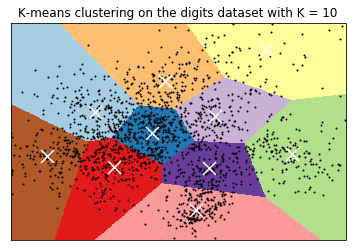

In [3]:
reduced_data = PCA(n_components=2).fit_transform(data)
kmeans = KMeans(init='k-means++', n_clusters=10, n_init=10)
kmeans.fit(reduced_data)

h = .03     # point in the mesh [x_min, m_max]x[y_min, y_max].

x_min, x_max = reduced_data[:, 0].min() + 1, reduced_data[:, 0].max() - 3
y_min, y_max = reduced_data[:, 1].min() + 1, reduced_data[:, 1].max() - 3
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

Z = kmeans.predict(np.c_[xx.ravel(), yy.ravel()])

Z = Z.reshape(xx.shape)
plt.figure(1)
plt.clf()
plt.imshow(Z, interpolation='nearest',
           extent=(xx.min(), xx.max(), yy.min(), yy.max()),
           cmap=plt.cm.Paired,
           aspect='auto', origin='lower')

plt.plot(reduced_data[:, 0], reduced_data[:, 1], 'k.', markersize=2)

centroids = kmeans.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1],
            marker='x', s=169, linewidths=3,
            color='w', zorder=10)
plt.title('K-means clustering on the digits dataset with K = 10')
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())
plt.show()